In [111]:
# Objective:
# The objective of this assignment is to implement PCA on a given dataset and analyse the results.
# 
# Instructions:
# Download the wine dataset from the UCI Machine Learning Repository
# Load the dataset into a Pandas dataframe.
# Split the dataset into features and target variables.
# Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
# Implement PCA on the preprocessed dataset using the scikit-learn library.
# Determine the optimal number of principal components to retain based on the explained variance ratio.
# Visualise the results of PCA using a scatter plot.
# Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
# Interpret the results of PCA and clustering analysis.
# 
# Deliverables:
# Jupyter notebook containing the code for the PCA implementation.
# A report summarising the results of PCA and clustering analysis.
# Scatter plot showing the results of PCA.
# A table showing the performance metrics for the clustering algorithm.

import pandas as pd
df = pd.read_csv('wine.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [112]:
with open('wine.names','r') as f:
    a = f.read()
    print(a)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [113]:
cat_columns = ['target','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
               'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [114]:
data = df.rename(columns=dict(zip(df.columns, cat_columns)))
data.head()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   target                        178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [116]:
data.describe()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [117]:
data.isnull().sum()

target                          0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [128]:
X = data.drop(labels=['target'],axis=1)
y = data[['target']]

In [129]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca

PCA(n_components=4)

In [147]:
X_train_pca = pca.fit_transform(X_train)
X_train_pca

array([[-3.00694856e+00, -4.40981870e-01, -8.41224999e-01,
         3.40377084e-01],
       [ 4.78492109e-01,  1.99040077e+00, -6.89619200e-01,
         4.27102730e-01],
       [ 1.40660818e+00,  7.73276041e-01, -1.54703099e+00,
        -1.53037588e+00],
       [ 1.37812234e+00, -6.78678942e-01,  6.37309422e-01,
        -1.01585565e+00],
       [ 8.03241389e-01,  2.29897938e+00, -2.13367727e-01,
         1.17337748e+00],
       [ 2.52549396e+00, -4.31524605e-02, -2.65067048e-01,
         1.09499917e-01],
       [-4.21872658e+00, -7.03728079e-01, -1.34066601e+00,
         1.18187380e+00],
       [ 1.09417691e+00,  2.39642124e+00, -1.32904952e+00,
         3.37545206e-01],
       [ 2.09665166e+00,  1.45056999e+00, -1.81631901e+00,
        -2.23024345e+00],
       [-2.92264448e+00, -1.45942117e+00, -1.03525620e+00,
         2.66594050e-01],
       [ 1.74666644e+00, -8.13784663e-01, -1.03859959e+00,
        -6.82511458e-01],
       [ 2.41727418e+00, -1.38829474e+00, -7.62654665e-01,
      

In [148]:
X_test_pca = pca.transform(X_test)
X_test_pca

array([[ 2.01965548, -1.12280932, -0.12214463,  0.31411626],
       [ 1.08146849, -1.83197537,  0.20441044,  0.81226102],
       [-2.67736386, -0.20426117,  0.76211757, -0.60695701],
       [ 2.49457107, -1.17769938,  1.43144972, -0.23478981],
       [ 0.23297494,  2.21075969, -1.22379687,  0.14351916],
       [ 2.1482354 , -2.27506445,  1.03272081, -0.81035338],
       [-0.42670823,  2.17852645, -0.70165038,  1.30787431],
       [-2.55071452, -1.67494596,  0.29038799,  0.24777248],
       [ 1.66033038,  1.58106029,  1.46918809,  0.45102847],
       [-2.2286822 , -0.46730409, -0.83734505, -0.36461693],
       [ 1.77412823,  0.33459487,  0.89529108,  0.03763078],
       [-2.30584434, -2.15608089,  0.44975434, -0.82117324],
       [ 0.66029565, -0.33482097, -0.79883021,  1.39298422],
       [-2.34788933,  1.0638212 , -1.91858478,  1.02925555],
       [ 2.24106704, -1.78344636,  0.47713277, -1.12612353],
       [-0.21176437,  1.9558106 , -0.17148094,  0.78735704],
       [-0.33346815,  2.

In [149]:
pca.components_

array([[ 0.13443023, -0.25680248, -0.0113463 , -0.23405337,  0.15840049,
         0.39194918,  0.41607649, -0.27871336,  0.33129255, -0.11383282,
         0.29726413,  0.38054255,  0.27507157],
       [-0.49571937, -0.21988534, -0.25579499,  0.09630359, -0.26616487,
        -0.06381624, -0.00971648, -0.0275335 , -0.0073265 , -0.54829944,
         0.27616688,  0.15580423, -0.39269514],
       [-0.12605367,  0.08398481,  0.67171617,  0.58764561,  0.11734551,
         0.15444497,  0.17404674,  0.24065975,  0.07724329, -0.06523068,
         0.08675172,  0.17043147, -0.08888266],
       [ 0.04624624,  0.56428416, -0.14966332, -0.00919969, -0.52679936,
         0.26095189,  0.20649548,  0.02063026,  0.315633  ,  0.0475105 ,
        -0.30623963,  0.20186583, -0.17851478]])

In [150]:
pca.explained_variance_ratio_

array([0.36196226, 0.18763862, 0.11656548, 0.07578973])

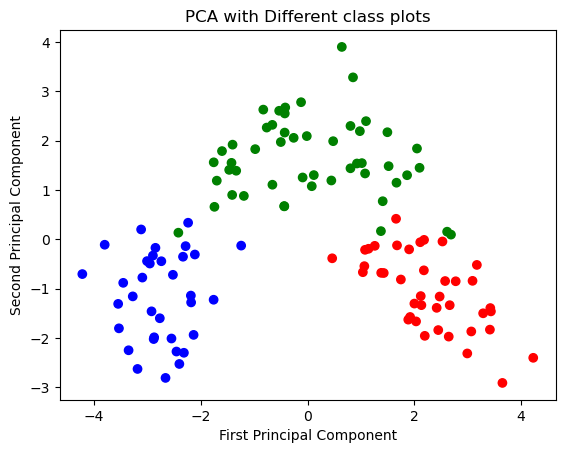

In [151]:
import matplotlib.pyplot as plt
import numpy as np
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=y_train['target'].map(colors))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with Different class plots')
plt.show()

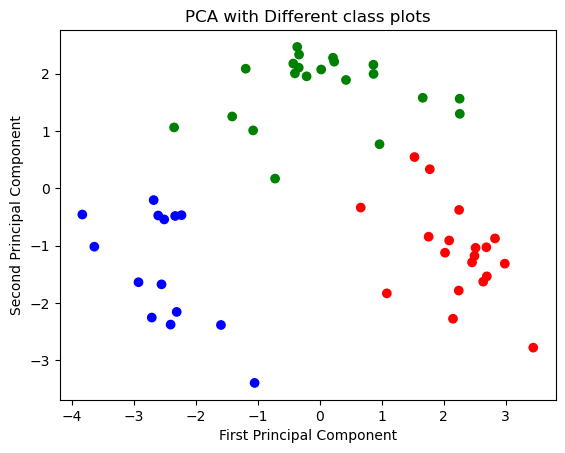

In [153]:
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=y_test['target'].map(colors))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with Different class plots')
plt.show()

In [159]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='k-means++')
y_labels = km.fit_predict(X_train_pca)

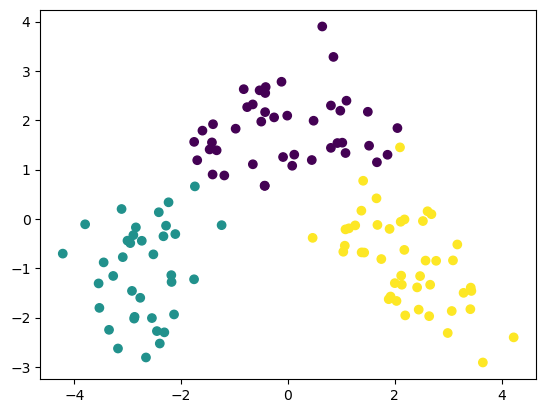

In [160]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_labels)

In [162]:
y_test_labels = km.predict(X_test_pca)
y_test_labels

array([2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 1], dtype=int32)

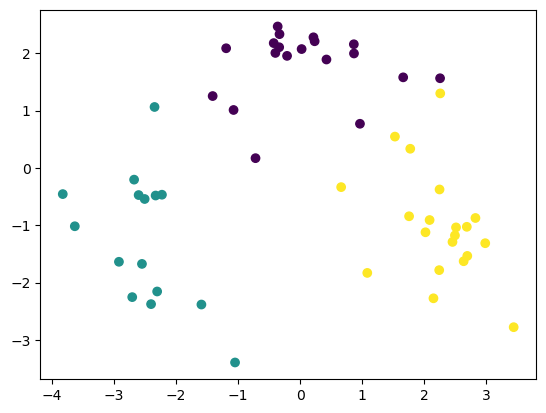

In [163]:
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_test_labels)

# Interpretation of Clustering results
1. K-means Clustering helped to identify pattern without the target variables.
2. Actual Clusters and Predicted clusters are very similar excluding some exceptions.
3. Both are work similar on test data some datapoints go here and there but it do similar prediction.